# Imports

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import punkt
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import string, re

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
data = pd.read_csv('data_collection/twitter_sentiment_data.csv')

In [3]:
from archive_functions import *

# Class Imbalance

Text(0, 0.5, 'Percentage')

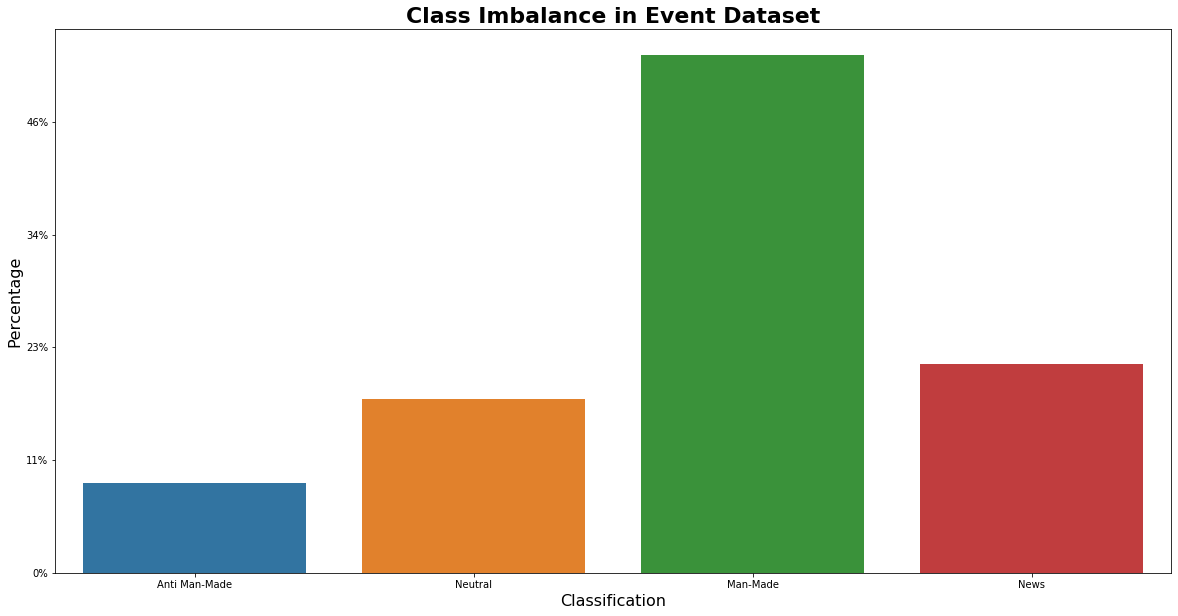

In [4]:
# Getting the length of each class subset
class_imbalance = [len(data[data.sentiment == -1]), 
                   len(data[data.sentiment == 0]), 
                   len(data[data.sentiment == 1]), 
                   len(data[data.sentiment == 2])]

# specifying classes for graphing
class_labels = ['Anti Man-Made','Neutral','Man-Made','News']

# graphing class imbalance
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(class_labels, class_imbalance, ax = ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(43943))
plt.title('Class Imbalance in Event Dataset', fontsize=22, fontweight='bold')
plt.xlabel('Classification', fontsize=16)
plt.ylabel('Percentage', fontsize=16)

# Sentiment

## Textblob

### Polarity

In [5]:
# creating polarity score column from Textblob polarity
data['polarity_score'] = data['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [6]:
textblob_sentiment_analysis(data, 'polarity_score', 0)

0.251% of the anti man-made data is below the polarity_score threshold of 0
0.173% of the neutral data is below the polarity_score threshold of 0
0.196% of the man-made data is below the polarity_score threshold of 0
0.164% of the news data is below the polarity_score threshold of 0


0.307% of the anti man-made data is above the polarity_score threshold of 0
0.307% of the neutral data is above the polarity_score threshold of 0
0.307% of the man-made data is above the polarity_score threshold of 0
0.307% of the news data is above the polarity_score threshold of 0


### Subjectivity

In [7]:
# creating subjectivity score column from Textblob subjectivity
data['subjectivity_score'] = data['message'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [8]:
textblob_sentiment_analysis(data, 'subjectivity_score', 0.5)

0.737% of the anti man-made data is below the subjectivity_score threshold of 0.5
0.78% of the neutral data is below the subjectivity_score threshold of 0.5
0.708% of the man-made data is below the subjectivity_score threshold of 0.5
0.813% of the news data is below the subjectivity_score threshold of 0.5


0.191% of the anti man-made data is above the subjectivity_score threshold of 0.5
0.191% of the neutral data is above the subjectivity_score threshold of 0.5
0.191% of the man-made data is above the subjectivity_score threshold of 0.5
0.191% of the news data is above the subjectivity_score threshold of 0.5


### Plotting Polarity vs Subjectivity

Text(0, 0.5, 'Subjectivity')

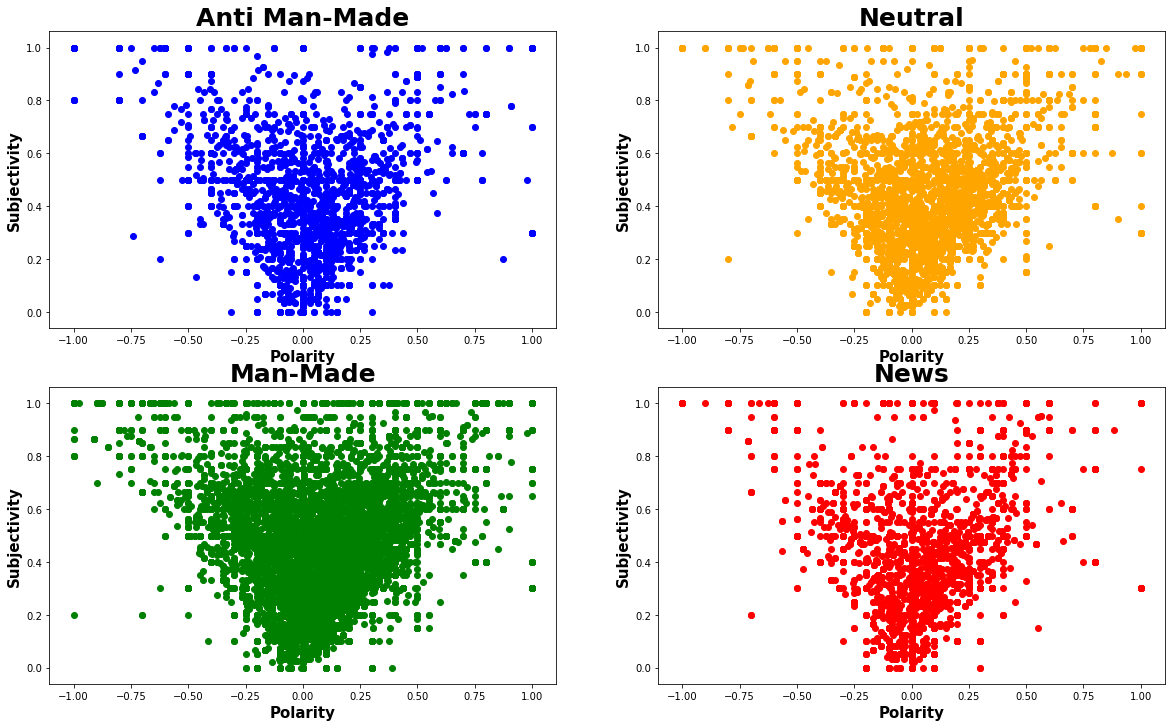

In [9]:
# Subsetting dataframe by class
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Configuring subplots for sentiment graphing
fig, ax = plt.subplots(2,2, figsize=(20,12))

# Anti man-made subplot
ax[0,0].scatter(anti['polarity_score'], anti['subjectivity_score'], color='blue')
ax[0,0].set_title('Anti Man-Made', fontsize=25, fontweight='bold')
ax[0,0].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[0,0].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Neutral subplot
ax[0,1].scatter(neutral['polarity_score'], neutral['subjectivity_score'], color='orange')
ax[0,1].set_title('Neutral', fontsize=25, fontweight='bold')
ax[0,1].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[0,1].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Man-made subplot
ax[1,0].scatter(man['polarity_score'], man['subjectivity_score'], color='green')
ax[1,0].set_title('Man-Made', fontsize=25, fontweight='bold')
ax[1,0].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[1,0].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# News subplot
ax[1,1].scatter(news['polarity_score'], news['subjectivity_score'], color='red')
ax[1,1].set_title('News', fontsize=25, fontweight='bold')
ax[1,1].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[1,1].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Tweet Length

Text(0, 0.5, 'Median')

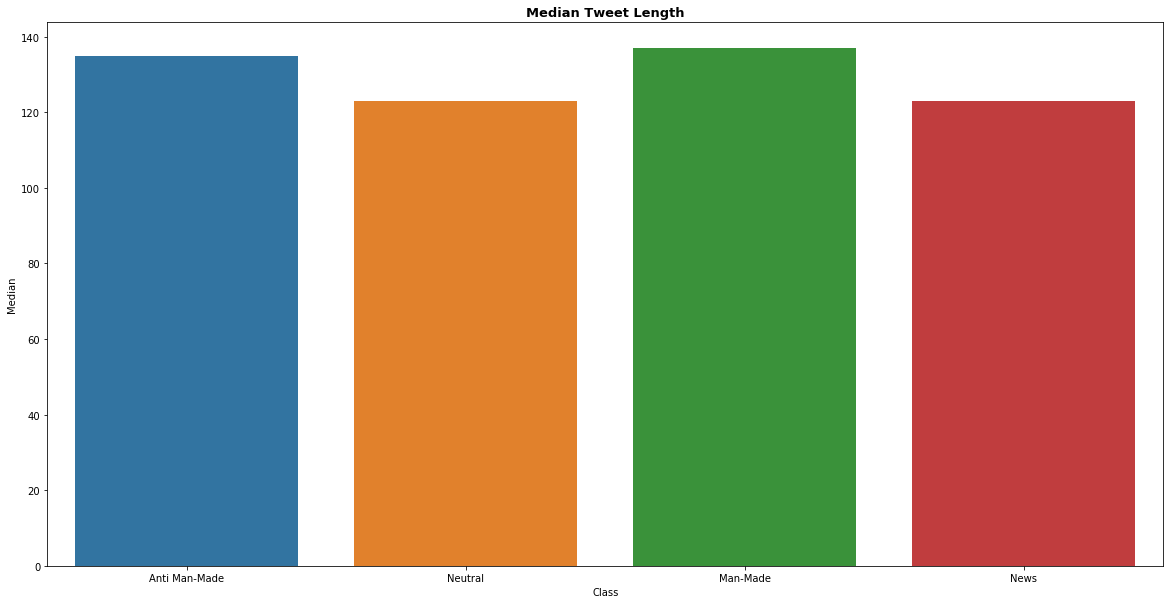

In [10]:
# Creating tweet length column
data['text_length'] = data['message'].apply(lambda x: len(x))

# Resetting class subsets to include new column
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Getting median tweet length for each class
avg_length_anti = anti.text_length.median()
avg_length_neutral = neutral.text_length.median()
avg_length_man = man.text_length.median()
avg_length_news = news.text_length.median()

# Specifying y-values
length_medians = (avg_length_anti, avg_length_neutral, avg_length_man, avg_length_news)

# Building graph
plt.figure(figsize=(20,10))
sns.barplot(class_labels, length_medians)
plt.title('Median Tweet Length', fontsize=13, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Median')

# Hyperlinks

## Hyperlink Present

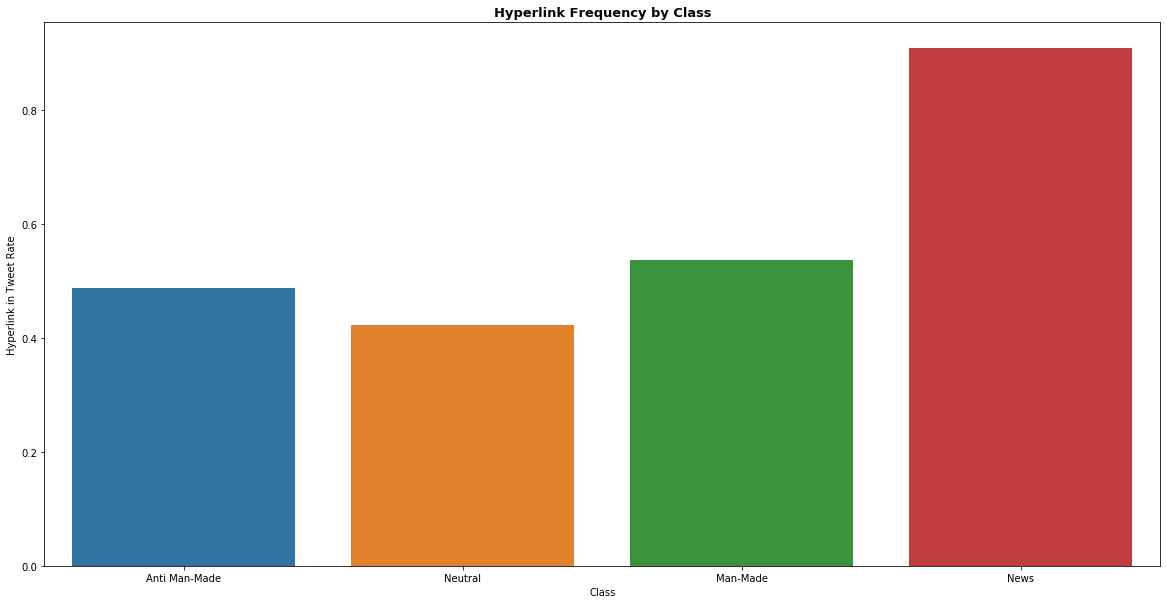

In [11]:
element_present_plot('hyperlink_present','http','Hyperlink')

## Hyperlink Origin Website

What is the origin website or the hyperlink?
Format: https://t.co/hyperlink_origin_website

In [12]:
# data['hyperlink_origin_website'] = data.message
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: x.split(' '))
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: [i for i in x if i.startswith('http')])
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: x[0] if len(x) > 1 else x)
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: str(x)[1:-1])
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: x.split('/')[-1])
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: x.replace("'", ''))
# data.hyperlink_origin_website = data.hyperlink_origin_website.apply(lambda x: 'No Hyperlink' if len(x) < 2 else x)


In [13]:
# anti_hyperlink_dict = {'oSPeY48nOh':6,'oSPeY3QMpH':5,'GjZHk91m2E.':4,'oSPeY48nOh.':4,'9on0KbSwn':3}
# neutral_hyperlink_dict = {'8ZYOZK4KfR':18,'8JsbiG0TfP':7,'LWWFA5aoiC':4,'8QsUzRURXz':3,'iqsmOmRlTk':2}
# man_hyperlink_dict = {'u1UbQXLmrF':20,'e76UJNCYN8':10,'tR1DclGWEz':8,'tFswYjwczQ':8,'3nG3t7oJZI':8}
# news_hyperlink_dict = {'eWVQtI28t':19,'CO0p9PU3Fd':10,'ig8sxJGw2':7,'wZ6VbM60K8':7,'cKamQurLWC':7}

In [14]:
# neutral_hyperlink_dict.keys() = []

In [15]:
# https://t.co/LWWFA5aoiC

COME BACK TO ANTI FOR REPEATS. FIGURE OUT HOW TO ACCOUNT FOR SAME WEBSITE. HOW MANY CONSECUTIVE LETTERS IN ID INDICATES SAME SITE?

In [16]:
# anti = data[data.sentiment == -1]
# neutral = data[data.sentiment == 0]
# man = data[data.sentiment == 1]
# news = data[data.sentiment == 2]

# anti_hyperlink_frequencies = anti.hyperlink_origin_website

# Retweets

## Retweet Present

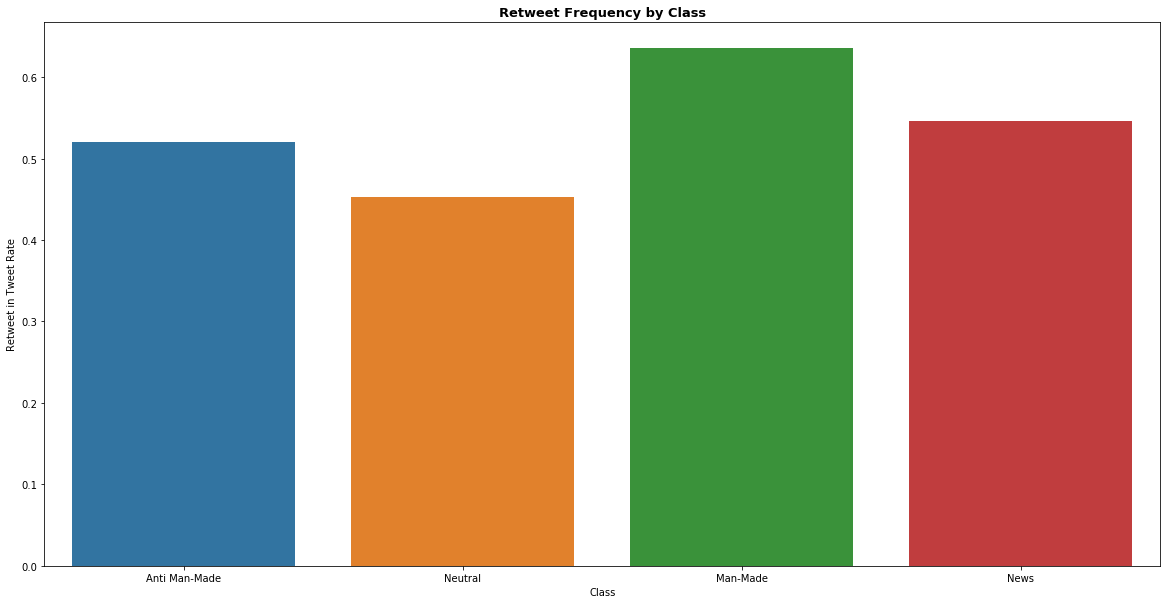

In [17]:
element_present_plot('retweet_present','RT','Retweet')

# Mentions

## Mention Present

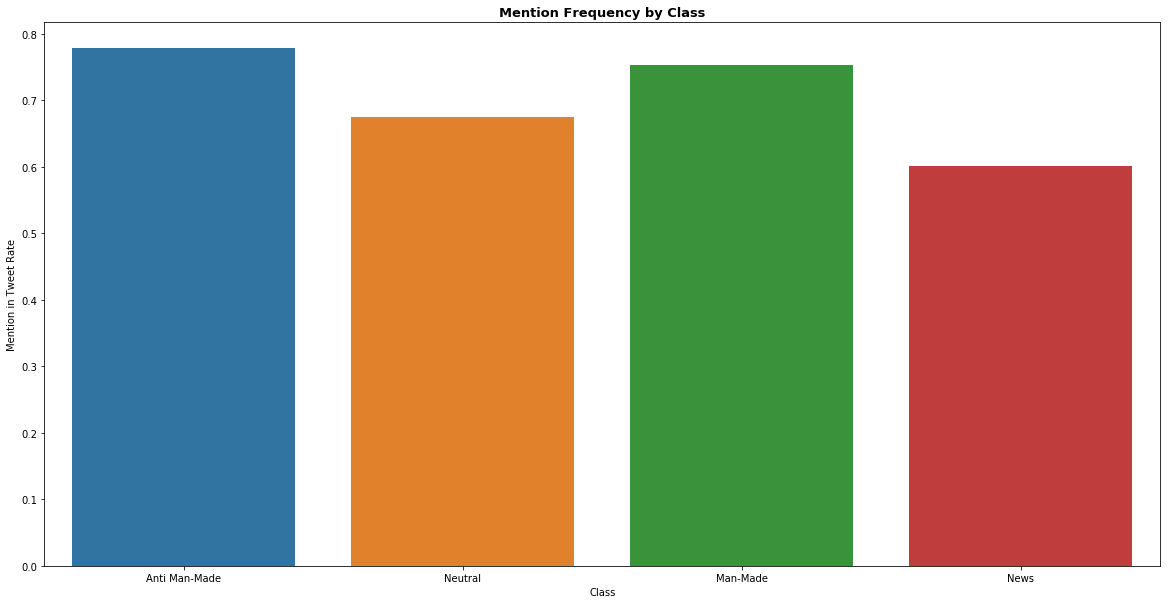

In [18]:
element_present_plot('mention_present', '@','Mention')

## Number of Mentions

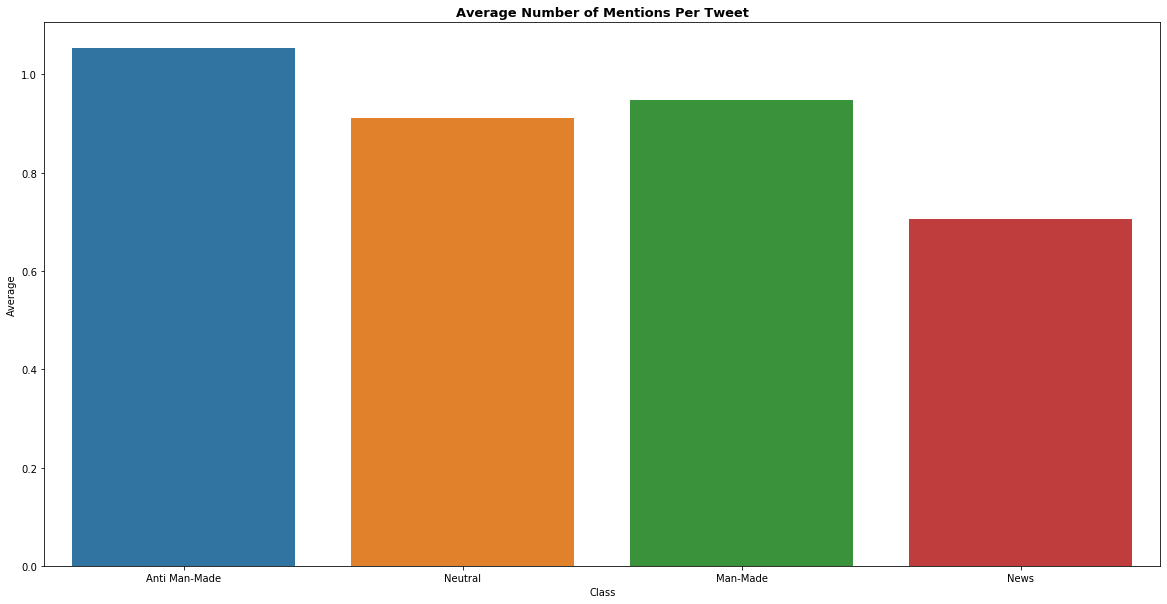

In [19]:
element_count_plot('mention_count', '@','Mention')

# Hashtags

## Hashtag Present

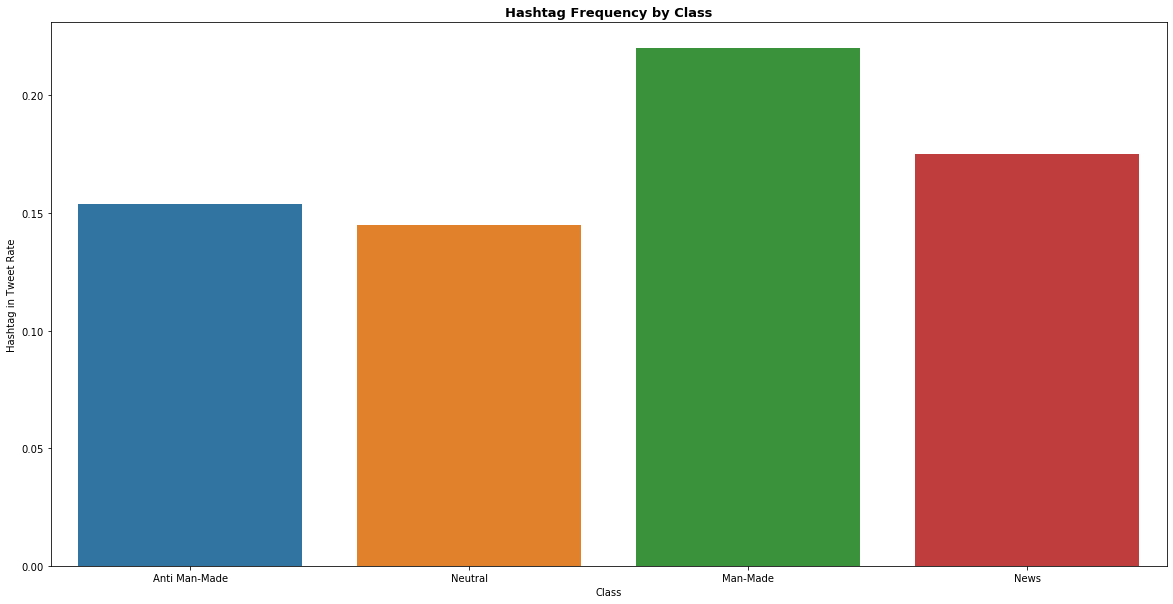

In [20]:
element_present_plot('hashtag_present', '#','Hashtag')

## Number of Hashtags

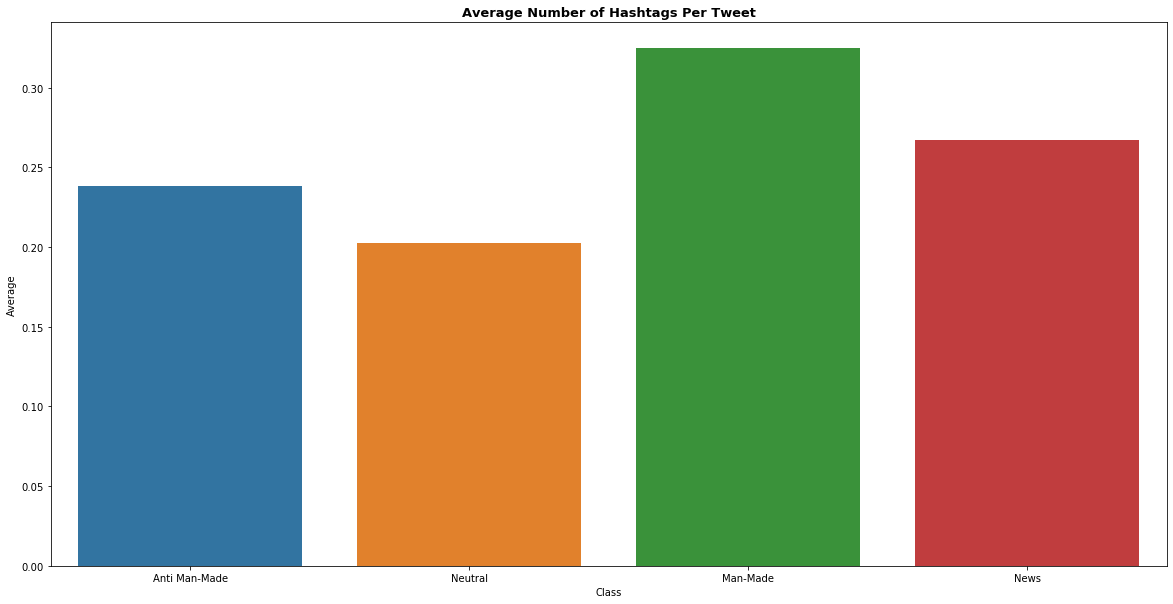

In [21]:
element_count_plot('hashtag_count', '#','Hashtag')

# Word Usage

In [22]:
# word_usage = data

In [23]:
# tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# word_usage.message = word_usage.message.apply(lambda x: tokenizer.tokenize(x))

In [24]:
# def lower(word_list):
#     lowered = []
#     for x in word_list:
#         x = x.lower()
#         lowered.append(x)
#     return lowered

# word_usage.message = word_usage.message.apply(lambda x: lower(x))

In [25]:
# word_usage.message = word_usage.message.apply(lambda x: ','.join(x))
# word_usage.message = word_usage.message.apply(lambda x: x.replace(',',' '))

In [26]:
# word_usage_anti = word_usage[word_usage.sentiment == -1]
# word_usage_neutral = word_usage[word_usage.sentiment == 0]
# word_usage_man = word_usage[word_usage.sentiment == 1]
# word_usage_news = word_usage[word_usage.sentiment == 2]

In [27]:
# anti_full_text = " ".join(tweet for tweet in word_usage_anti.message)
# neutral_full_text = " ".join(tweet for tweet in word_usage_neutral.message)
# man_full_text = " ".join(tweet for tweet in word_usage_man.message)
# news_full_text = " ".join(tweet for tweet in word_usage_news.message)

## Tier 1 Words

In [28]:
# from archive_functions import *

In [29]:
# tier_one = load_tier1_words()

# anti_full_text_tier_1 = 0

# for word in anti_full_text:
#     if word in tier_one:
#         anti_full_text_tier_1 +=1

# anti_tier_vs_tier = anti_full_text_tier_2_and_3 / anti_full_text_tier_total

# neutral_full_text_tier_1 = 0
# neutral_full_text_tier_2_and_3 = 0

# for word in neutral_full_text:
#     if word in tier_one:
#         neutral_full_text_tier_1 +=1
#     elif word in tier_two_three:
#         neutral_full_text_tier_2_and_3 +=1

# neutral_full_text_tier_total = neutral_full_text_tier_1 + neutral_full_text_tier_2_and_3

# neutral_tier_vs_tier = neutral_full_text_tier_2_and_3 / neutral_full_text_tier_total

# man_full_text_tier_1 = 0
# man_full_text_tier_2_and_3 = 0

# for word in man_full_text:
#     if word in tier_one:
#         man_full_text_tier_1 +=1
#     elif word in tier_two_three:
#         man_full_text_tier_2_and_3 +=1

# man_full_text_tier_total = man_full_text_tier_1 + man_full_text_tier_2_and_3

# man_tier_vs_tier = man_full_text_tier_2_and_3 / man_full_text_tier_total

# news_full_text_tier_1 = 0
# news_full_text_tier_2_and_3 = 0

# for word in news_full_text:
#     if word in tier_one:
#         news_full_text_tier_1 +=1
#     elif word in tier_two_three:
#         news_full_text_tier_2_and_3 +=1

# news_full_text_tier_total = news_full_text_tier_1 + news_full_text_tier_2_and_3

# news_tier_vs_tier = news_full_text_tier_2_and_3 / news_full_text_tier_total

In [30]:
# print(news_full_text_tier_2_and_3)

In [31]:
# plt.bar(['Anti Man-Made','Neutral','Man-Made','News'], (anti_tier_vs_tier,neutral_tier_vs_tier,man_tier_vs_tier,news_tier_vs_tier))



# Uppercase Letters

In [32]:
# Tokenize and filter for letters
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# Create uppercase present column
data['uppercase_present'] = data.message.apply(lambda x: tokenizer.tokenize(x))

In [33]:
# Checking if there are uppercase words per observation
data.uppercase_present = data.uppercase_present.apply(lambda x: check_uppercase(x))

Text(0, 0.5, 'Average')

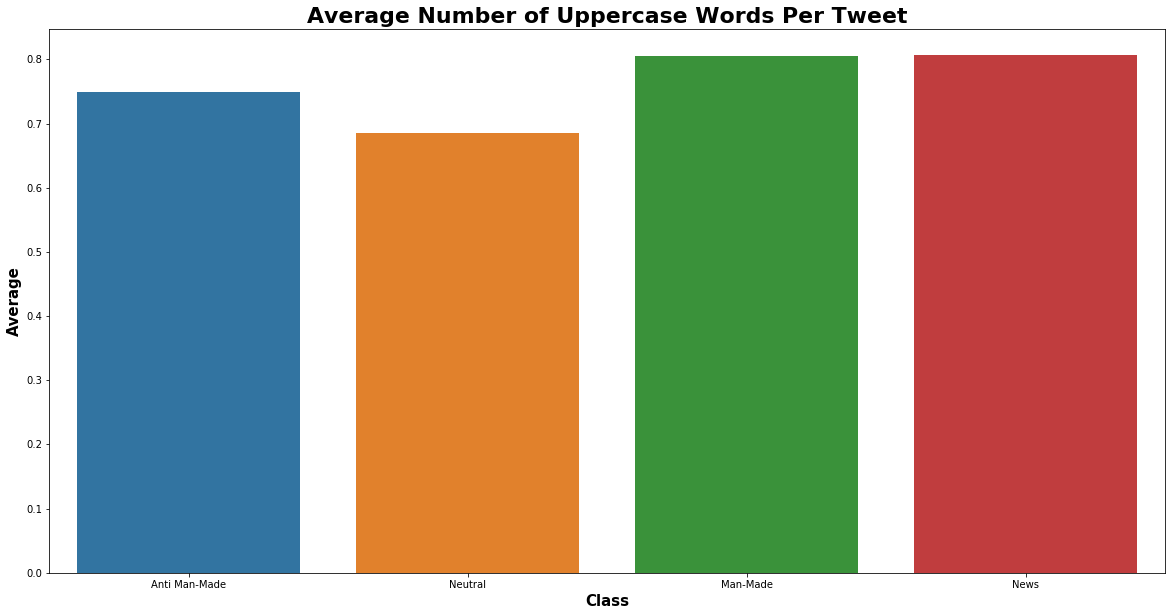

In [34]:
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

uppercase_count_perc = ((anti.uppercase_present.sum() / len(anti)),
                       (neutral.uppercase_present.sum() / len(neutral)),
                       (man.uppercase_present.sum() / len(man)),
                       (news.uppercase_present.sum() / len(news)))
                        
                        
plt.figure(figsize=(20,10))
sns.barplot(class_labels, uppercase_count_perc)
plt.title('Average Number of Uppercase Words Per Tweet', fontsize=22, fontweight='bold')
plt.xlabel('Class', fontsize=15, fontweight='bold')
plt.ylabel('Average', fontsize=15, fontweight='bold')

# Word Associations

In [35]:
republican_party_words = load_republican_party_words()
democratic_party_words = load_democratic_party_words()
climate_change_words = load_climate_change_words()
news_words = load_news_words()

## Republican Party

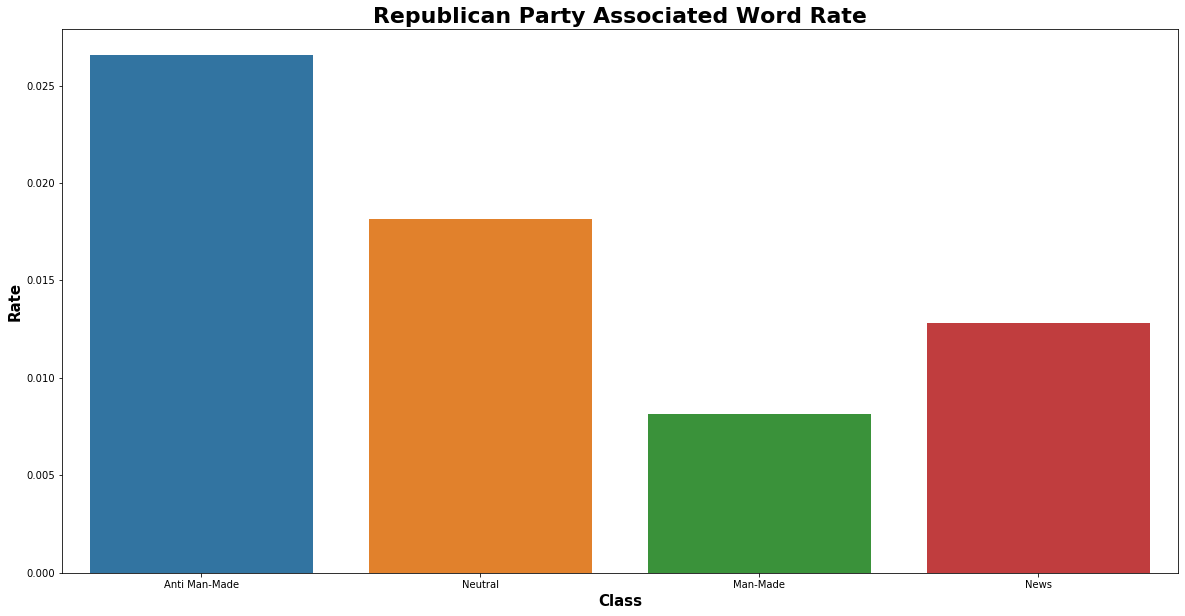

In [36]:
word_associations_plot(republican_party_words, 'Republican Party')

## Democratic Party

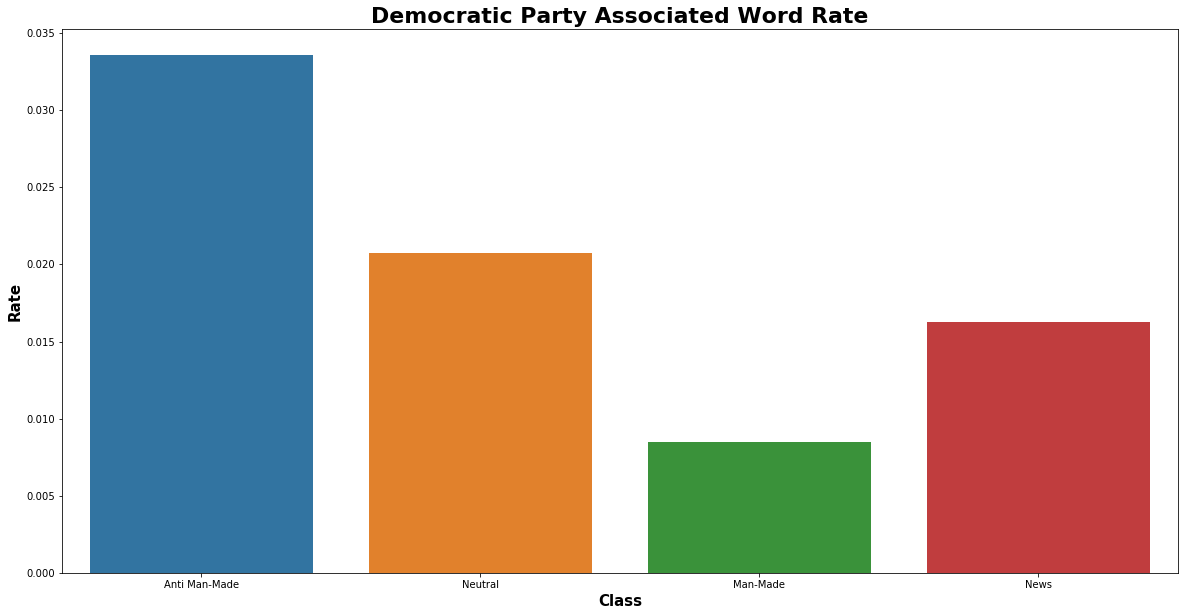

In [37]:
word_associations_plot(democratic_party_words, 'Democratic Party')

## Climate Change

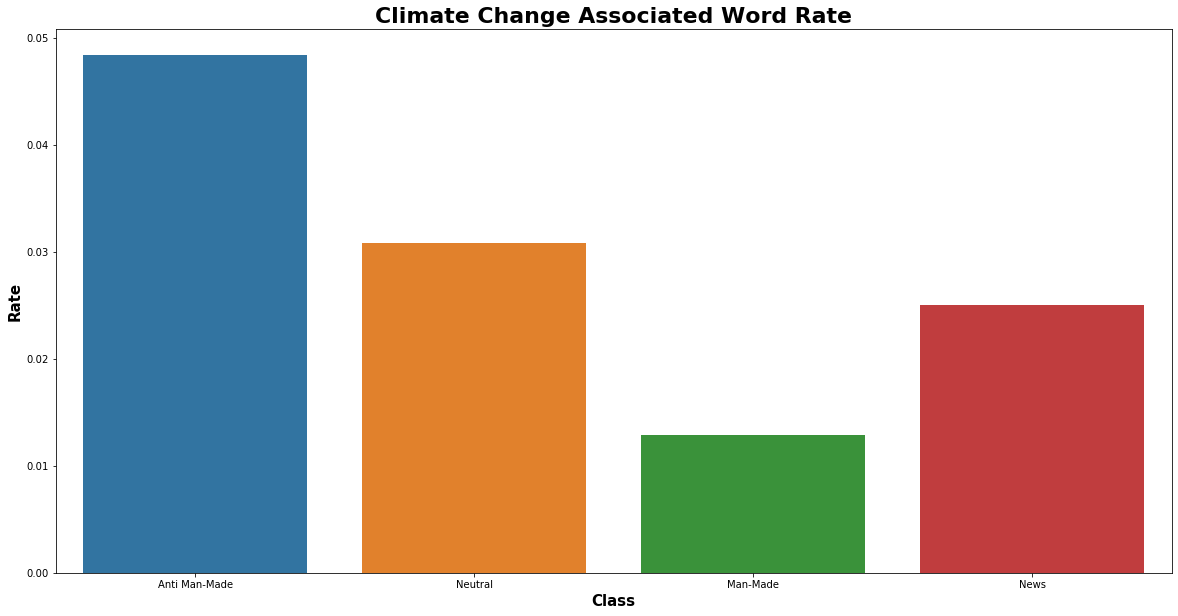

In [38]:
word_associations_plot(climate_change_words, 'Climate Change')

## News

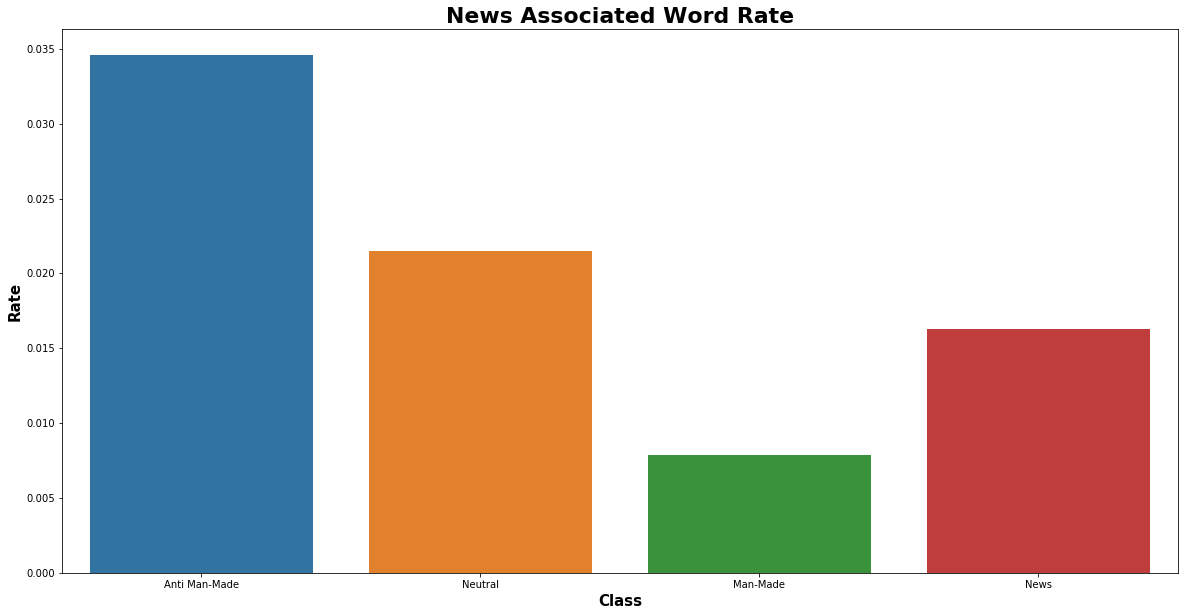

In [39]:
word_associations_plot(news_words, 'News')

# Punctuation

## Data Prep

In [58]:
# Reading in data again 
data = pd.read_csv('data_collection/twitter_sentiment_data.csv')
tokenizer = RegexpTokenizer(r'[!?$%:;]')
data.message = data.message.apply(lambda x: tokenizer.tokenize(x))

## Exclamation Points

In [60]:
data.message[2].count('!')

4

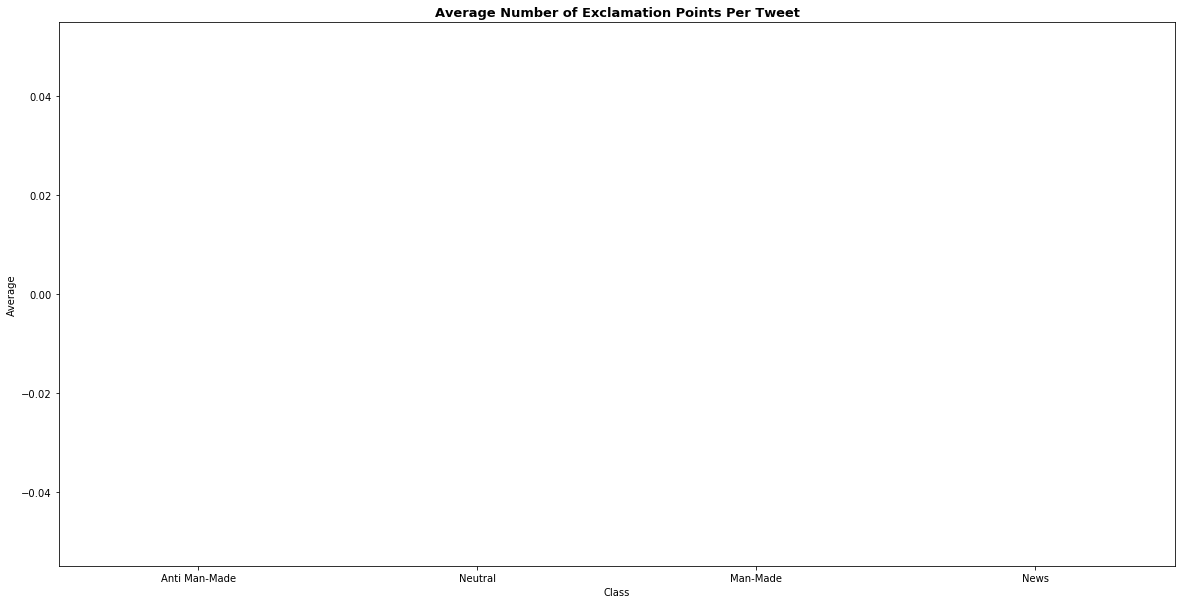

In [62]:
element_count_plot('phillip','!','Exclamation Point')

## Question Mark

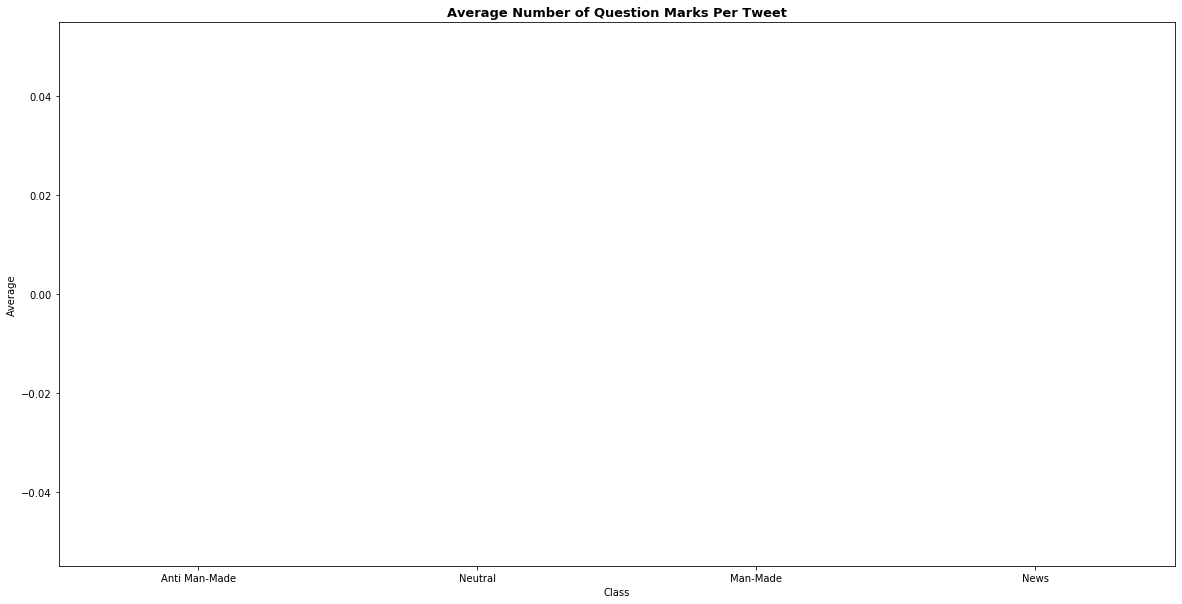

In [42]:
element_count_plot('question_mark_count','?','Question Mark')

## Dollar Sign

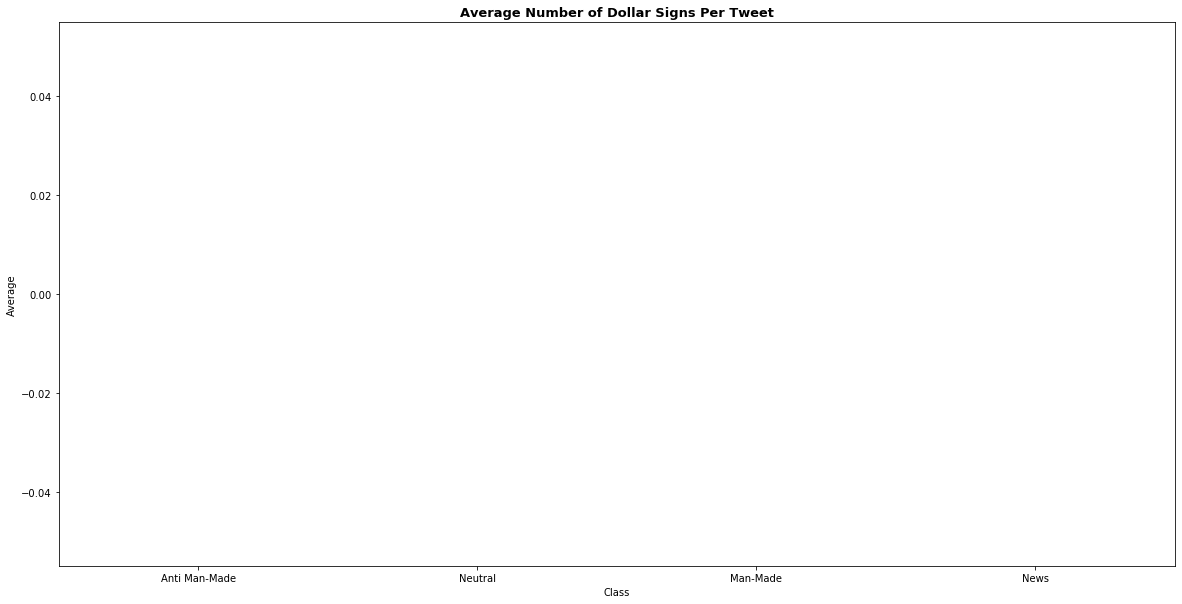

In [43]:
element_count_plot('dollar_sign_count','$','Dollar Sign')

## Percent Symbol

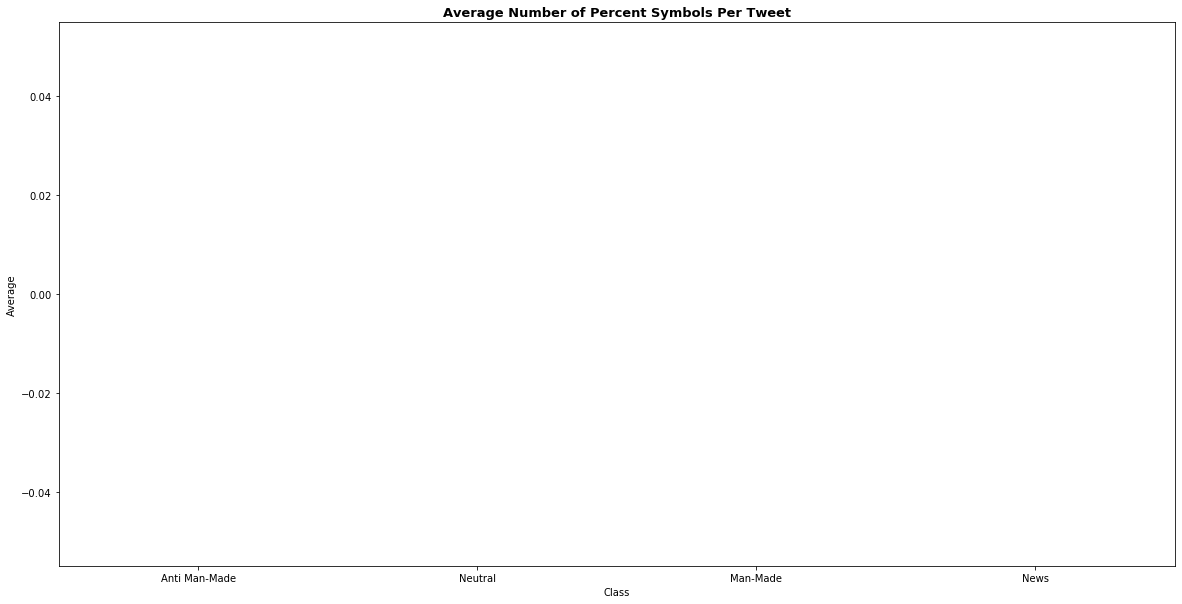

In [44]:
element_count_plot('percent_symbol_count','%','Percent Symbol')

## Colon

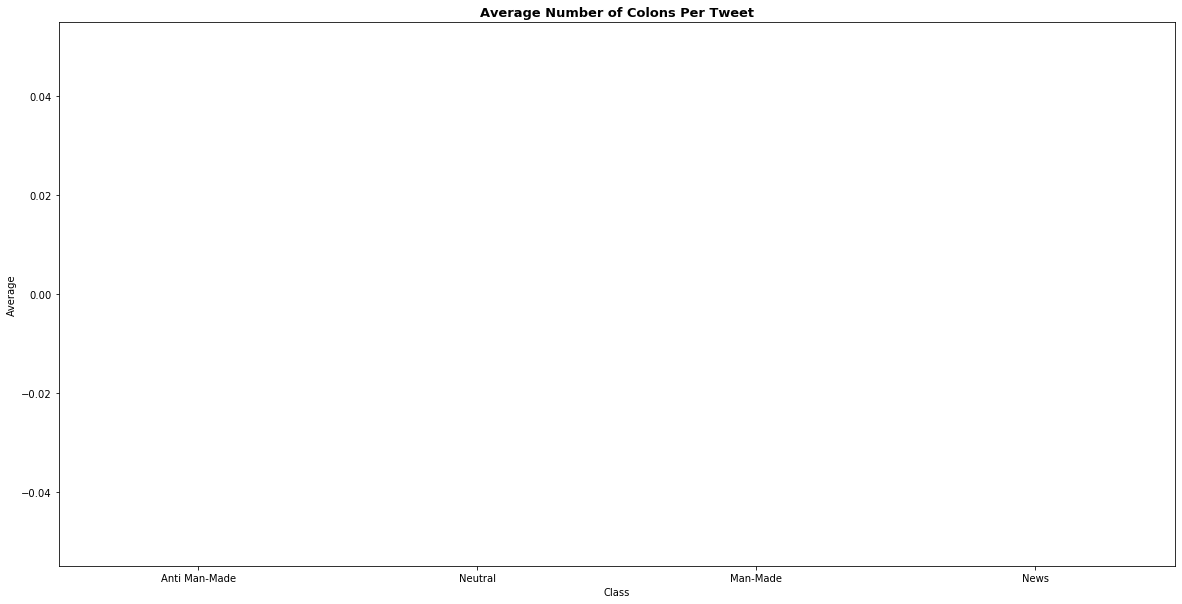

In [45]:
element_count_plot('colon_count',':','Colon')

## Semi Colon

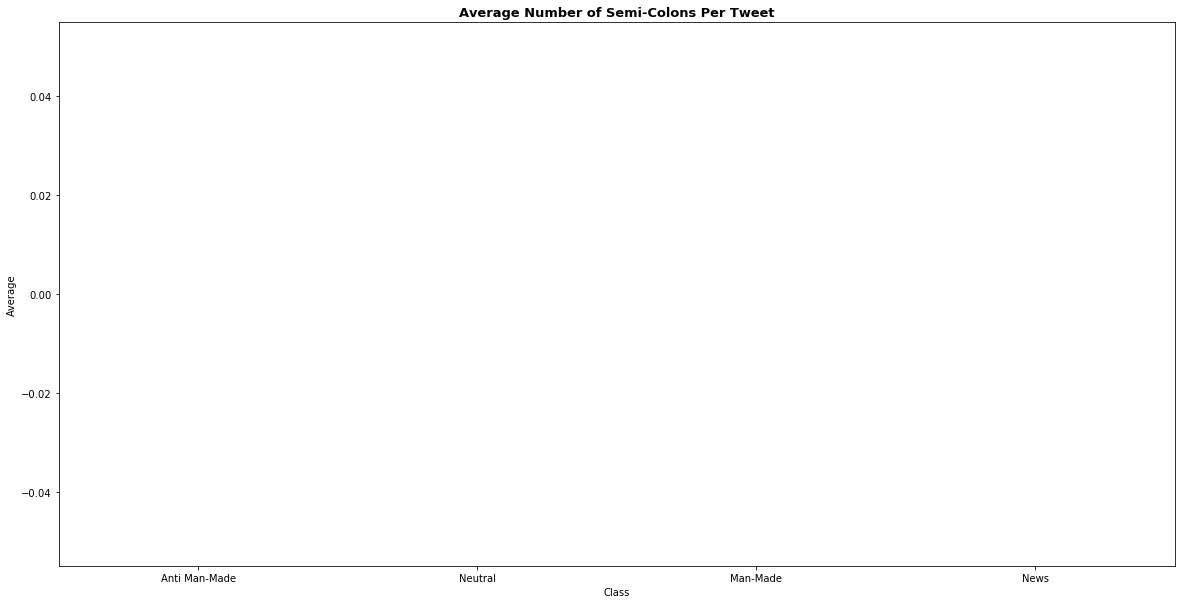

In [46]:
element_count_plot('semicolon_count',';','Semi-Colon')